<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning for Covid-19 Vaccination process</h1>
    <h3 align="center">Pouya Jafari</h3>
    
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
import pycaret.regression as caret

##  Load and Prepare Data

In [6]:
data = pd.read_csv("/content/country_vaccinations.csv")
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


## EDA

In [7]:
data.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,3.487200e+04,3.338700e+04,3.077400e+04,2.840500e+04,6.596400e+04,34872.000000,33387.000000,30774.000000,65964.000000
mean,3.357830e+07,1.342228e+07,9.778293e+06,2.772051e+05,1.364650e+05,62.694791,34.968768,28.674557,3495.352996
std,1.730459e+08,5.276935e+07,3.831746e+07,1.273848e+06,8.208942e+05,56.275645,27.648268,26.033862,4160.725120
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3.925522e+05,2.778055e+05,1.656195e+05,5.371000e+03,1.005000e+03,10.210000,7.720000,4.202500,679.000000
50%,2.563082e+06,1.639806e+06,1.140760e+06,2.631000e+04,7.712000e+03,48.125000,31.580000,21.490000,2280.500000
75%,1.207973e+07,6.512414e+06,5.444750e+06,1.272430e+05,4.436100e+04,108.822500,60.290000,51.717500,5080.000000
max,2.769530e+09,1.225000e+09,1.193466e+09,2.474100e+07,2.242429e+07,321.000000,122.180000,118.860000,117497.000000


In [8]:
data.shape

(66330, 15)

## Data Preprocessing

In [12]:
data.isnull().sum() / data.shape[0]

country                                0.000000
iso_code                               0.000000
date                                   0.000000
total_vaccinations                     0.474265
people_vaccinated                      0.496653
people_fully_vaccinated                0.536047
daily_vaccinations_raw                 0.571762
daily_vaccinations                     0.005518
total_vaccinations_per_hundred         0.474265
people_vaccinated_per_hundred          0.496653
people_fully_vaccinated_per_hundred    0.536047
daily_vaccinations_per_million         0.005518
vaccines                               0.000000
source_name                            0.000000
source_website                         0.000000
dtype: float64

In [13]:
clean_vaccine_data = data.dropna()
clean_vaccine_data.isnull().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

## Strorytelling - Visualization

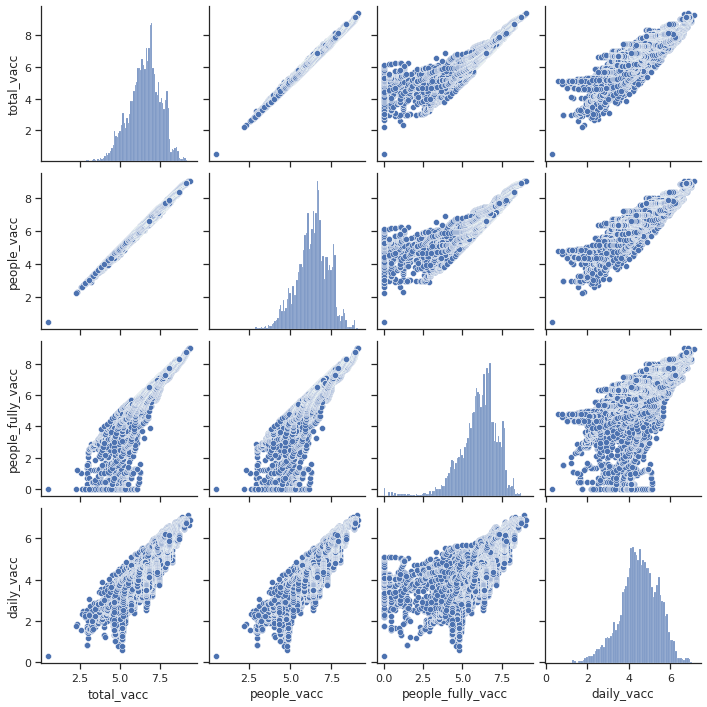

In [14]:
clean_vaccine_data['total_vacc'] = np.log10(clean_vaccine_data['total_vaccinations'])
clean_vaccine_data['people_vacc'] = np.log10(clean_vaccine_data['people_vaccinated'])
clean_vaccine_data['people_fully_vacc'] = np.log10(clean_vaccine_data['people_fully_vaccinated'])
clean_vaccine_data['daily_vacc'] = np.log10(clean_vaccine_data['daily_vaccinations'])

clean_vaccine_data = clean_vaccine_data.drop(columns = ['total_vaccinations','people_vaccinated','people_fully_vaccinated', 'daily_vaccinations'])


covid_features = clean_vaccine_data[['date', 'total_vacc', 'people_vacc' , 'people_fully_vacc' , 'daily_vacc']]
sns.set_theme(style="ticks")
sns.pairplot(covid_features)

In [15]:
sub_data = clean_vaccine_data[["country","date","total_vaccinations_per_hundred"]]

print(sub_data.head(5))

         country        date  total_vaccinations_per_hundred
94   Afghanistan  2021-05-27                            1.49
101  Afghanistan  2021-06-03                            1.58
318      Albania  2021-02-18                            0.11
400      Albania  2021-05-11                           21.67
401      Albania  2021-05-12                           22.02


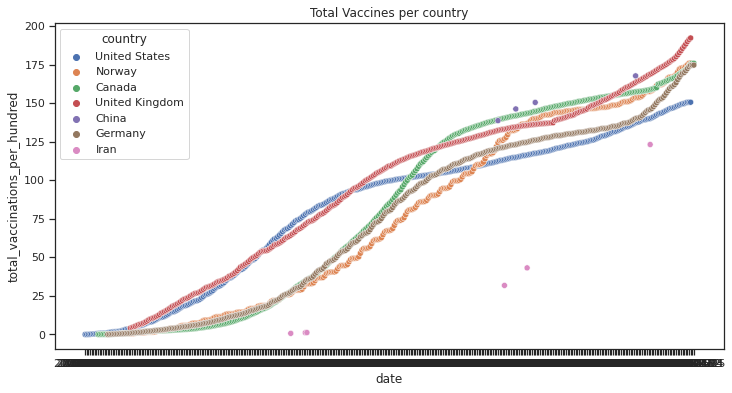

In [18]:
US_data = sub_data.loc[sub_data["country"] == "United States"]
Norway_data = sub_data.loc[sub_data["country"] == "Norway"]
Canada_data = sub_data.loc[sub_data["country"] == "Canada"]
UK_data = sub_data.loc[sub_data["country"] == "United Kingdom"]
China_data = sub_data.loc[sub_data["country"] == "China"]
Germany_data = sub_data.loc[sub_data["country"] == "Germany"]
Iran_data = sub_data.loc[sub_data["country"] == "Iran"]

world_countries = pd.concat([US_data, Norway_data, Canada_data, UK_data, China_data, Germany_data, Iran_data], axis = 0)

plt.figure(figsize = (12,6))
plt.title("Total Vaccines per country")
sns.scatterplot(x = world_countries['date'], y = world_countries['total_vaccinations_per_hundred'], hue = world_countries['country'])
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(np.arange(0, len(x), step = 5), rotation = 45)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")

## Train the model

In [19]:
data = pd.DataFrame()
data['Date'] = pd.to_datetime(US_data['date'])
data['Target'] = US_data['total_vaccinations_per_hundred']
data.reset_index(drop = True , inplace = True)

In [20]:
data['Series'] = np.arange(1 , len(data)+1)

data['Shift1'] = data.Target.shift(1)

window_len = 10
window = data['Shift1'].rolling(window = window_len)
means = window.mean()
data['Window_mean'] = means


data.dropna(inplace = True)
data.reset_index(drop = True , inplace=True)

dates = data['Date'] 

data = data[['Series' , 'Window_mean' , 'Shift1' , 'Target']]

data.isnull().sum()

Series         0
Window_mean    0
Shift1         0
Target         0
dtype: int64

In [21]:
data.shape

(365, 4)

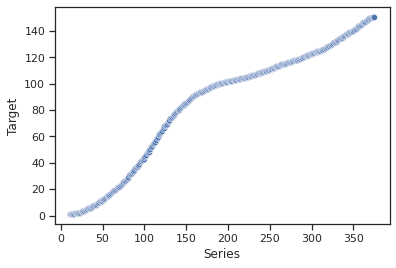

In [22]:
sns.scatterplot(data=data, x='Series', y='Target')

In [43]:
train = data.iloc[:292,:] 
test = data.iloc[292:,:]

setup = caret.setup(data = data, test_data = test ,target = 'Target' , fold_strategy = 'timeseries'
                 , remove_perfect_collinearity = False , numeric_features = ['Series' , 'Window_mean' , 'Shift1'] 
                     , fold = 5 , session_id = 51)

,Description,Value
0,session_id,51
1,Target,Target
2,Original Data,"(365, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(365, 3)"


In [44]:
best = caret.compare_models(sort = 'MAE' , turbo = False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2800,0.1679,0.3230,0.9971,0.0040,0.0036,0.026
lar,Least Angle Regression,0.2800,0.1683,0.3230,0.9971,0.0040,0.0036,0.040
ransac,Random Sample Consensus,0.2800,0.1679,0.3230,0.9971,0.0040,0.0036,0.038
ard,Automatic Relevance Determination,0.2806,0.1899,0.3144,0.9964,0.0038,0.0035,0.026
kr,Kernel Ridge,0.2842,0.1916,0.3236,0.9961,0.0039,0.0034,0.028
huber,Huber Regressor,0.2859,0.1805,0.3330,0.9972,0.0042,0.0038,0.044
br,Bayesian Ridge,0.2950,0.1886,0.3394,0.9968,0.0042,0.0038,0.032
tr,TheilSen Regressor,0.3656,0.2780,0.4169,0.9953,0.0052,0.0048,0.550
ridge,Ridge Regression,0.3834,0.3287,0.4346,0.9950,0.0056,0.0051,0.034
omp,Orthogonal Matching Pursuit,0.3888,0.2602,0.4356,0.9931,0.0050,0.0045,0.032


In [69]:
best = caret.create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7046,0.6506,0.8066,0.9972,0.0146,0.0135
1,0.8818,0.9377,0.9684,0.9805,0.0099,0.0094
2,0.1209,0.0186,0.1365,0.9982,0.0013,0.0011
3,0.0691,0.0091,0.0954,0.9994,0.0008,0.0006
4,0.1407,0.0275,0.1659,0.9995,0.0012,0.0010
Mean,0.3834,0.3287,0.4346,0.9950,0.0056,0.0051
SD,0.3400,0.3908,0.3740,0.0073,0.0057,0.0053


In [70]:
_ = caret.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.1265,0.0238,0.1544,0.9997,0.0011,0.0009


## Test Results

In [71]:
future = pd.DataFrame(columns = ['Series' , 'Window_mean' , 'Shift1'])
future['Series'] = np.arange(191,341) 
future['Window_mean'] = np.nan
future['Shift1'] = np.nan

future.iloc[0,2] = data['Target'].max()
sum = 0
for i in range(window_len):
    sum += data.iloc[len(data)-1-i,3]
    
future.iloc[0,1] = sum/window_len
future.shape

(150, 3)

In [72]:
for j in range(len(future)):
    current_row = j
    next_row = j+1
    
    
    if current_row != len(future)-1 :
        #print(current_row, next_row)
        pr = caret.predict_model(best , future.iloc[[current_row]])['Label']
        future.iloc[next_row,2] = float(pr)
        
       # print(future.iloc[next_row,2]-future.iloc[current_row,2])
        
        
        if next_row < 9 :
            sum = 0
            num_rows_from_data = window_len - (next_row + 1)
            num_rows_from_future = window_len - num_rows_from_data

            for i in range(num_rows_from_data):
                sum += data.iloc[len(data)-1-i , 2]


            for i in range(num_rows_from_future):
                sum += future.iloc[next_row - i , 2]

            future.iloc[next_row , 1] = sum/window_len


        elif next_row >= 9:
            sum = 0
            for i in range(window_len):
                sum += future.iloc[next_row-i,2]
            future.iloc[next_row,1] = sum/window_len

In [73]:
from datetime import date , datetime , timedelta

future['Predicted'] = future['Shift1'].shift(-1)

start = datetime.strptime("2021-12-26", "%Y-%m-%d")
date_generated = [start + timedelta(days=x) for x in range(0, 150)]
date_list = []
for date in date_generated:
    date_list.append(date.strftime("%Y-%m-%d"))
    
future['Date'] = date_list

future = future[['Date' , 'Predicted']]
future.dropna(inplace = True)
future['Predicted'] += 25

In [74]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=Canada_data['date'], y = Canada_data['total_vaccinations_per_hundred']
                                ,mode='lines', line_color='red' , name = 'Until now'))
fig.add_trace(go.Scatter(x=future['Date'], y=future['Predicted'],mode='lines', line=dict(color="#0000ff"), name = 'Future'))

fig.update_layout(template = 'plotly_dark')

fig.show()

In [75]:
caret.save_model(best, 'US_Vaccination')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['Series',
                                                           'Window_mean',
                                                           'Shift1'],
                                       target='Target', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_n...
                 ('dummy', Dummify(target='Target')),
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'pa